# **Bank Subscription Classifier**

### **Step 1 : Load necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Step 2 : Load dataset**

In [2]:
df = pd.read_csv('bank.csv', sep=';')

### **Step 3 : Cleaning & understanding the data**

In [3]:
# age : Age of the client
# job : Type of job (categorical)
# marital : Marital status
# education : Education level
# default : Has credit in default? (yes/no)
# balance : Average yearly balance in euros
# housing : Has housing loan? (yes/no)
# loan : Has personal loan? (yes/no)
# contact : Contact communication type
# day : Last contact day of the month
# month : Last contact month of the year
# duration : Last contact duration, in seconds
# campaign : Number of contacts during this campaign
# pdays : Days since last contact (999 = never contacted)
# previous : Number of contacts performed before this campaign
# poutcome : Outcome of the previous marketing campaign
# y : Target : has the client subscribed? (yes/no)

In [4]:
df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
529,40,management,married,tertiary,no,1584,yes,no,telephone,21,nov,661,1,-1,0,unknown,no
3978,66,retired,married,tertiary,no,1948,no,no,cellular,28,jan,216,1,91,4,success,yes
236,33,blue-collar,married,secondary,no,3576,yes,no,cellular,2,apr,124,1,308,2,other,no
3958,34,management,married,tertiary,no,2594,yes,no,cellular,21,nov,161,3,-1,0,unknown,no
1825,60,entrepreneur,married,primary,no,0,no,no,telephone,23,jul,40,1,-1,0,unknown,no
485,55,housemaid,married,primary,no,136,yes,no,unknown,19,jun,15,10,-1,0,unknown,no
4113,43,self-employed,single,tertiary,no,0,no,no,unknown,19,jun,147,1,-1,0,unknown,no
31,31,technician,married,secondary,no,171,no,no,cellular,27,aug,81,3,-1,0,unknown,no
3321,35,blue-collar,divorced,primary,no,1792,yes,no,cellular,31,jul,630,6,-1,0,unknown,yes
3742,37,self-employed,married,tertiary,no,137,no,no,cellular,13,aug,244,6,-1,0,unknown,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [7]:
df.job.unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [8]:
df.poutcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [9]:
df1 = df.drop(['day', 'month', 'duration', 'pdays'], axis = 1)

In [10]:
df1['job'].value_counts()

job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64

In [11]:
df1['marital'].value_counts()

marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64

In [12]:
df1['contact'].value_counts()

contact
cellular     2896
unknown      1324
telephone     301
Name: count, dtype: int64

In [13]:
df1['education'].value_counts()

education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64

### **Step 4 : Data preprocessing**

#### ***One Hot Encoding for [job, marital, contact, poutcomes] columns***

In [14]:
dummies1 = pd.get_dummies(df1.job)
dummies2 = pd.get_dummies(df1.marital)
dummies3 = pd.get_dummies(df1.contact)
dummies4 = pd.get_dummies(df1.poutcome)

In [15]:
df2 = pd.concat([dummies1.drop('unknown', axis='columns'), dummies2, dummies3, dummies4, df1],axis = 'columns')
df3 = df2.drop(['job', 'marital', 'contact', 'poutcome'], axis='columns')

#### ***Ordinal Encoding for [education, default, housing, loan] columns***

In [16]:
from sklearn.preprocessing import OrdinalEncoder

In [17]:
education_order = [[ 'unknown','primary', 'secondary', 'tertiary']]
encoder = OrdinalEncoder(categories=education_order)
df3['education'] = encoder.fit_transform(df3[['education']])

In [18]:
default_order = [['no','yes']]
encoder = OrdinalEncoder(categories=default_order)
df3['default'] = encoder.fit_transform(df3[['default']])

In [19]:
loan_order = [['no','yes']]
encoder = OrdinalEncoder(categories=default_order)
df3['loan'] = encoder.fit_transform(df3[['loan']])

In [20]:
housing_order = [['no','yes']]
encoder = OrdinalEncoder(categories=housing_order)
df3['housing'] = encoder.fit_transform(df3[['housing']])

#### ***Label Encoding for target y***

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le = LabelEncoder()
df3['y'] = le.fit_transform(df['y'])

In [23]:
df4 = df3.astype(int)

### **Step 5 : Removing Outliers**

#### **Method 1**

In [24]:
campaign_count = df4['campaign'].value_counts()
common_campaign = campaign_count[campaign_count > 50].index
df5 = df4[df4['campaign'].isin(common_campaign)]

In [25]:
age_count = df5['age'].value_counts()
common_age = age_count[age_count > 50].index
df6 = df5[df5['age'].isin(common_age)]

In [26]:
previous_count = df6['previous'].value_counts()
common_previous = previous_count[previous_count > 100].index
df7 = df6[df6['previous'].isin(common_previous)]

#### **Method 2 [IQR]**

In [27]:
Q1 = df7['balance'].quantile(0.25)
Q3 = df7['balance'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df8 = df7[(df7['balance'] >= lower_bound) & (df7['balance'] <= upper_bound)]

In [28]:
print(f"Before removing outliers shape of the dataset : {df4.shape}")
print(f"After removing outliers shape of the dataset : {df8.shape}")

Before removing outliers shape of the dataset : (4521, 30)
After removing outliers shape of the dataset : (3433, 30)


#### **Data visualization of ['balance'] with and without outliers**

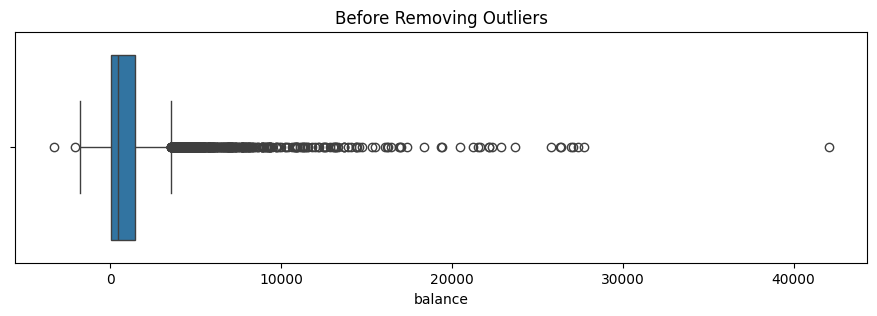

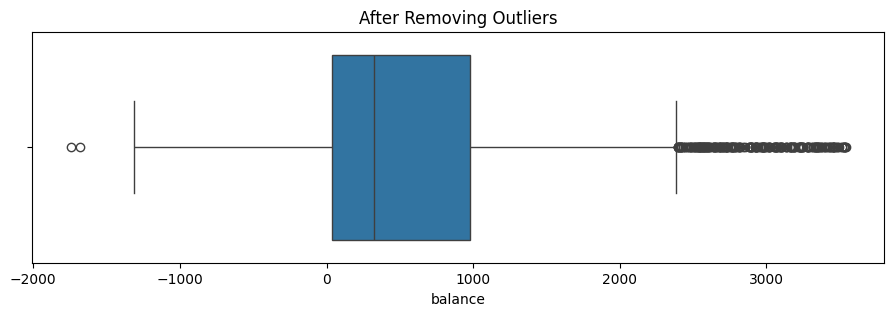

In [29]:
plt.figure(figsize = (11,3))
sns.boxplot(x = df7['balance'])
plt.title('Before Removing Outliers')
plt.show()

plt.figure(figsize = (11,3))
sns.boxplot(x = df8['balance'])
plt.title('After Removing Outliers')
plt.show()

### **Step 6 : Model building**

#### ***Split dataset into dependent and independent features***

In [30]:
# X = df8.drop('y', axis = 'columns')
# Y = df8['y']

#### **Unsampling the data because this data has 90% 'no' and 10% 'yes' so it kinda creating imbalance so I took help from chatgpt to figure it out.**

In [31]:
from sklearn.utils import resample

# Separate majority and minority classes
majority = df8[df8.y == 0]
minority = df8[df8.y == 1]

# Upsample minority
minority_upsampled = resample(minority, replace=True, n_samples=len(majority), random_state=42)

# Combine back
df9 = pd.concat([majority, minority_upsampled])

# Split 
X = df9.drop('y', axis=1)
Y = df9['y']

#### ***Train test split data***

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y)

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(penalty='l2', C=1.0, max_iter=1000, class_weight='balanced'))
])

pipeline.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [35]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))

Accuracy: 0.6462035541195477
Confusion Matrix:
 [[410 209]
 [229 390]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.66      0.65       619
           1       0.65      0.63      0.64       619

    accuracy                           0.65      1238
   macro avg       0.65      0.65      0.65      1238
weighted avg       0.65      0.65      0.65      1238



### **Thanks for Viewing**